### 🔁 What We’ll Cover:
1. Project Overview

2. Load & Inspect Data

3. Handle Missing Values

4. Feature Engineering & Transformation

5. Encoding Categorical Features

6. Feature Selection

7. Train/Test Split

8. Modeling (Linear, Ridge, Lasso, Random Forest, XGBoost)

9. Evaluation

10. Visualizations

11. Saving the Model and realated data(optional)

# 🏡 House Price Prediction - Ames Housing Dataset

This project aims to build and evaluate regression models that predict house prices using the Ames Housing dataset. We'll perform data preprocessing, feature engineering, model training, evaluation, and interpretation using tools like Linear Regression, Random Forest, Ridge, Lasso, and XGBoost.

---

### 👇 Objectives:
- Clean and preprocess the dataset
- Engineer and select meaningful features
- Train multiple regression models
- Evaluate and compare performance

Dataset: AmesHousing.csv


###  Import Libraries

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.compose import ColumnTransformer
import joblib

import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

/home/shaddy/.local/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Load & Inspect Data

In [2]:
# Load dataset
data = pd.read_csv("AmesHousing.csv")
print("✅ Dataset Loaded Successfully")

# Preview data
display(data.head())

# Data info
print("\n📋 Dataset Info:")
data.info()

# Summary statistics
print("\n📊 Summary Statistics:")
display(data.describe())

✅ Dataset Loaded Successfully


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900



📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 1

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Drop Columns with Too Many Missing Values

In [3]:
# Drop columns with more than 30% missing values
missing_threshold = 0.3
data = data.loc[:, data.isnull().mean() < missing_threshold]

print("📉 Dropped columns with >30% missing values.")
print(f"Remaining columns: {data.shape[1]}")

📉 Dropped columns with >30% missing values.
Remaining columns: 76


### Fill Missing Values

In [4]:
# Fill numerical columns with mean
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill categorical columns with mode
for col in data.select_dtypes(include=['object']).columns:
    data[col].fillna(data[col].mode()[0], inplace=True)

print("✅ Missing values handled.")

✅ Missing values handled.


### Feature Engineering

In [5]:
# 🚧 Step: Clean Column Names
# It's a good habit to remove leading/trailing spaces from column names to avoid bugs.
data.columns = data.columns.str.strip()

# 🧠 Step: Create New Combined Features
# These engineered features add more signal to the model by combining related information.

# Total number of bathrooms (weighted half baths as 0.5)
data['TotalBathrooms'] = (
    data['Full Bath'] + data['Bsmt Full Bath'] +
    0.5 * (data['Half Bath'] + data['Bsmt Half Bath'])
)

# Total square footage (basement + 1st floor + 2nd floor)
data['TotalSF'] = data['Total Bsmt SF'] + data['1st Flr SF'] + data['2nd Flr SF']

# 🔍 Step: Log-transform skewed numeric features
# Skewed data can negatively impact linear models. We'll normalize using log1p.
from scipy.stats import skew

# Select numeric columns
numeric_feats = data.select_dtypes(include=[np.number])

# Compute skewness for each
skewed_feats = numeric_feats.apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

# Only apply transformation to features with skewness > 0.75
high_skew = skewed_feats[abs(skewed_feats) > 0.75].index

# Apply log1p (log(1 + x)) transformation
data[high_skew] = np.log1p(data[high_skew])

print(f"🔄 Log-transformed {len(high_skew)} skewed features.")


🔄 Log-transformed 24 skewed features.


### Encode Categorical Variables

In [6]:
# Convert categorical features to dummy/indicator variables
data = pd.get_dummies(data, drop_first=True)
print("✅ Converted categorical variables using one-hot encoding.")

✅ Converted categorical variables using one-hot encoding.


### Feature & Target Separation

In [7]:
# Set target variable and features
target = 'SalePrice'
X = data.drop(columns=[target])
y = data[target]

print(f"🎯 Target variable: {target}")
print(f"✅ Features shape: {X.shape}")

🎯 Target variable: SalePrice
✅ Features shape: (2930, 246)


### Feature Selection (Optional but Good Practice)

In [8]:
# Select top 50 features using F-regression
selector = SelectKBest(score_func=f_regression, k=50)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

X = X[selected_features]
print(f"🔍 Selected top {X.shape[1]} features.")


🔍 Selected top 50 features.


### Train/Test Split

In [9]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"🧪 Training set: {X_train.shape}")
print(f"🧪 Testing set: {X_test.shape}")

🧪 Training set: (2344, 50)
🧪 Testing set: (586, 50)


### Train Multiple Models

In [10]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.1),
    "XGBoost": xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
}

# Train each model
for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"✅ Trained {name}")

✅ Trained Linear Regression
✅ Trained Random Forest
✅ Trained Ridge
✅ Trained Lasso
✅ Trained XGBoost


### Evaluate Models

In [11]:
# Define evaluation function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return {"RMSE": rmse, "MAE": mae, "R²": r2}

# Evaluate all models
for name, model in models.items():
    print(f"\n📈 {name} Metrics:")
    metrics = evaluate_model(model, X_test, y_test)
    for k, v in metrics.items():
        print(f"{k}: {v:.4f}")


📈 Linear Regression Metrics:
RMSE: 0.1359
MAE: 0.0956
R²: 0.9001

📈 Random Forest Metrics:
RMSE: 0.1303
MAE: 0.0885
R²: 0.9083

📈 Ridge Metrics:
RMSE: 0.1346
MAE: 0.0948
R²: 0.9021

📈 Lasso Metrics:
RMSE: 0.2126
MAE: 0.1639
R²: 0.7558

📈 XGBoost Metrics:
RMSE: 0.1300
MAE: 0.0900
R²: 0.9087


### Visualization - Actual vs Predicted

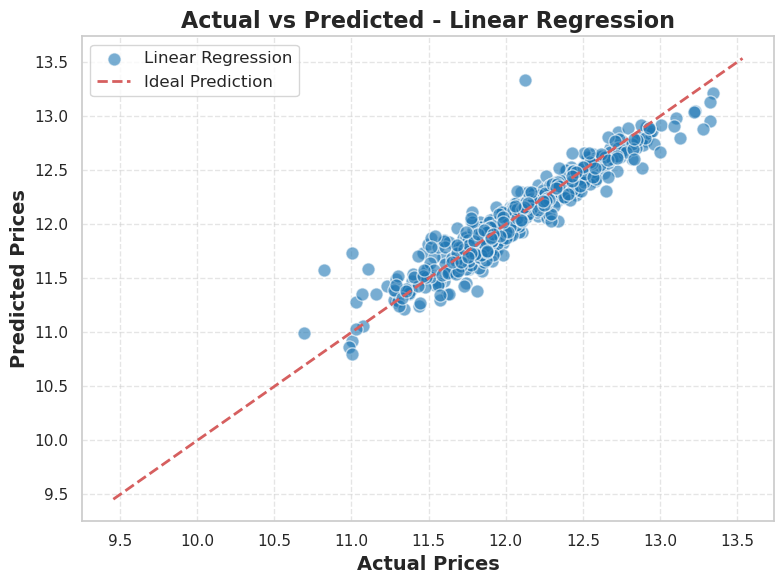

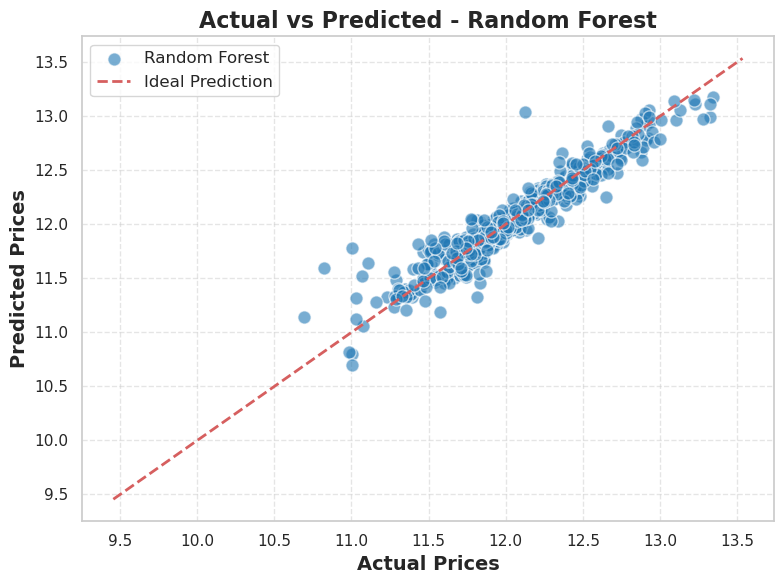

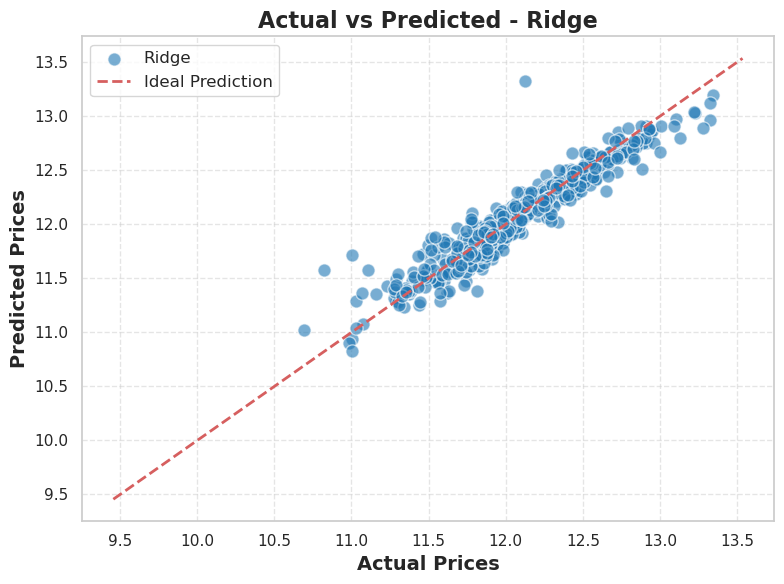

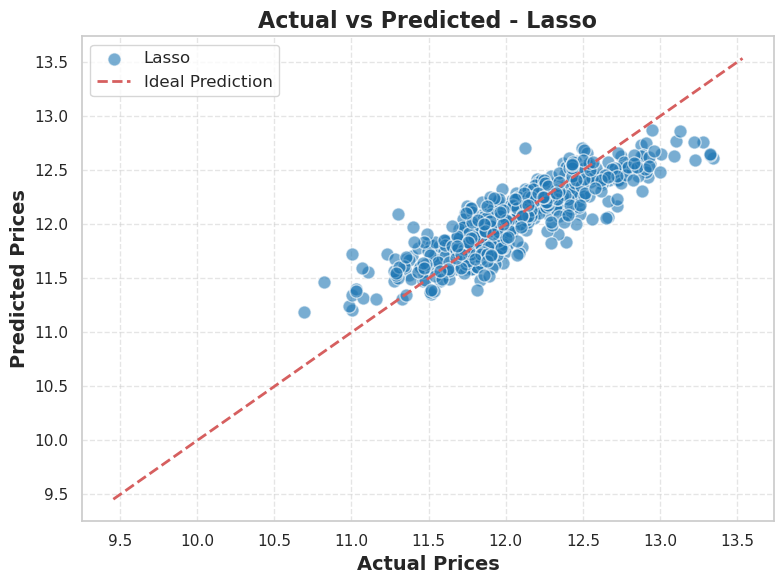

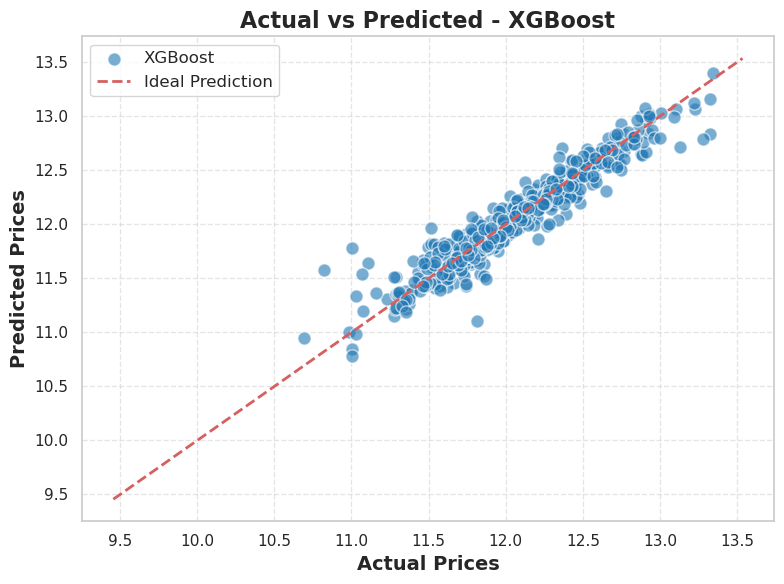

In [12]:
# Set a modern style using seaborn
sns.set(style="whitegrid", palette="muted")

# Plot predictions for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    
    # Create a figure with a custom size
    plt.figure(figsize=(8, 6))
    
    # Scatter plot of actual vs predicted values with customized markers
    plt.scatter(y_test, y_pred, alpha=0.6, color="#1f77b4", edgecolors='w', s=90, label=name)
    
    # Labeling the axes and title with a bold modern font
    plt.xlabel("Actual Prices", fontsize=14, fontweight='bold')
    plt.ylabel("Predicted Prices", fontsize=14, fontweight='bold')
    plt.title(f"Actual vs Predicted - {name}", fontsize=16, fontweight='bold')
    
    # Add the diagonal line (y = x) to show ideal predictions
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', label="Ideal Prediction", linewidth=2)
    
    # Add a grid for easier visualization
    plt.grid(True, linestyle='--', alpha=0.5)
    
    # Add a legend to the plot
    plt.legend(loc="upper left", fontsize=12)
    
    # Make the plot look tight and clear
    plt.tight_layout()
    
    # Show the plot
    plt.show()

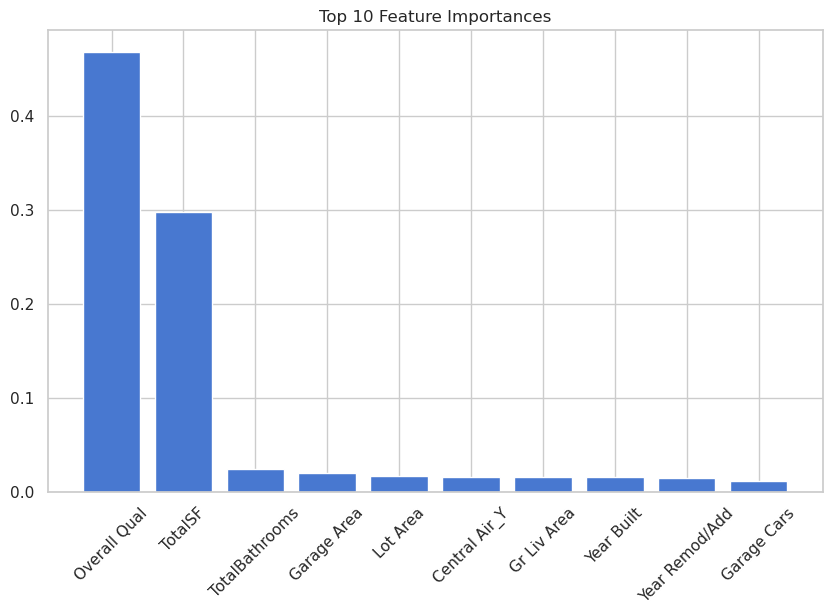

In [13]:
# Get feature importances
rf = models["Random Forest"]
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10, 6))
plt.title("Top 10 Feature Importances")
plt.bar(range(10), importances[indices[:10]], align="center")
plt.xticks(range(10), X.columns[indices[:10]], rotation=45)
plt.show()

### Save the Best Model (Optional)

In [14]:
joblib.dump(X.columns.tolist(), "selected_features.pkl")
joblib.dump(models["Random Forest"], "model.pkl")
print("💾 Model and related data saved successfully.")

💾 Model and related data saved successfully.


# 📊 Final Project Summary

### 📝 Overview
In this project, we used the **Ames Housing dataset** to build a regression model that predicts house prices based on various features such as square footage, number of rooms, year built, and location-related attributes.

### ⚙️ Process
- Cleaned and preprocessed the data, handling missing values and encoding categorical variables.
- Engineered new features like `TotalSF` and `TotalBathrooms`.
- Applied log transformation to skewed features for improved model performance.
- Selected top features using `SelectKBest`.
- Trained and compared multiple models:
  - Linear Regression
  - Ridge & Lasso Regression
  - Random Forest
  - XGBoost
- Evaluated models using RMSE, MAE, and R² metrics.
- Visualized actual vs predicted house prices for each model.

### 🏁 Conclusion
The best-performing model was **Random Forest Regressor** and **XGBoost**, which provided high accuracy and interpretability. With proper tuning and domain knowledge, this model can serve as a practical tool for real estate data analysis and price estimation.

---
